# Requirements

In [31]:
import warnings
import pandas as pd 
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [2]:
df = pd.read_csv('data/user_behavior_data.csv')

In [3]:
df.shape

(700, 11)

In [4]:
df.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
326,327,Samsung Galaxy S21,Android,199,6.0,1707,57,881.0,55.0,Male,3
63,64,Xiaomi Mi 11,NaN,545,11.5,2911,87,NaN,21.0,Female,5
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
145,146,iPhone 12,iOS,188,5.3,1281,45,NaN,35.0,Male,3
116,117,iPhone 12,iOS,75,1.2,409,13,281.0,18.0,Male,1


Preprocess the input and the output variables appropriately.

In [5]:
df.drop(columns=['User ID'], inplace=True)

In [6]:
warnings.filterwarnings('ignore', category=FutureWarning, message='Downcasting behavior in `replace` is deprecated')
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

Explore the dataset using visualizations of your choice.

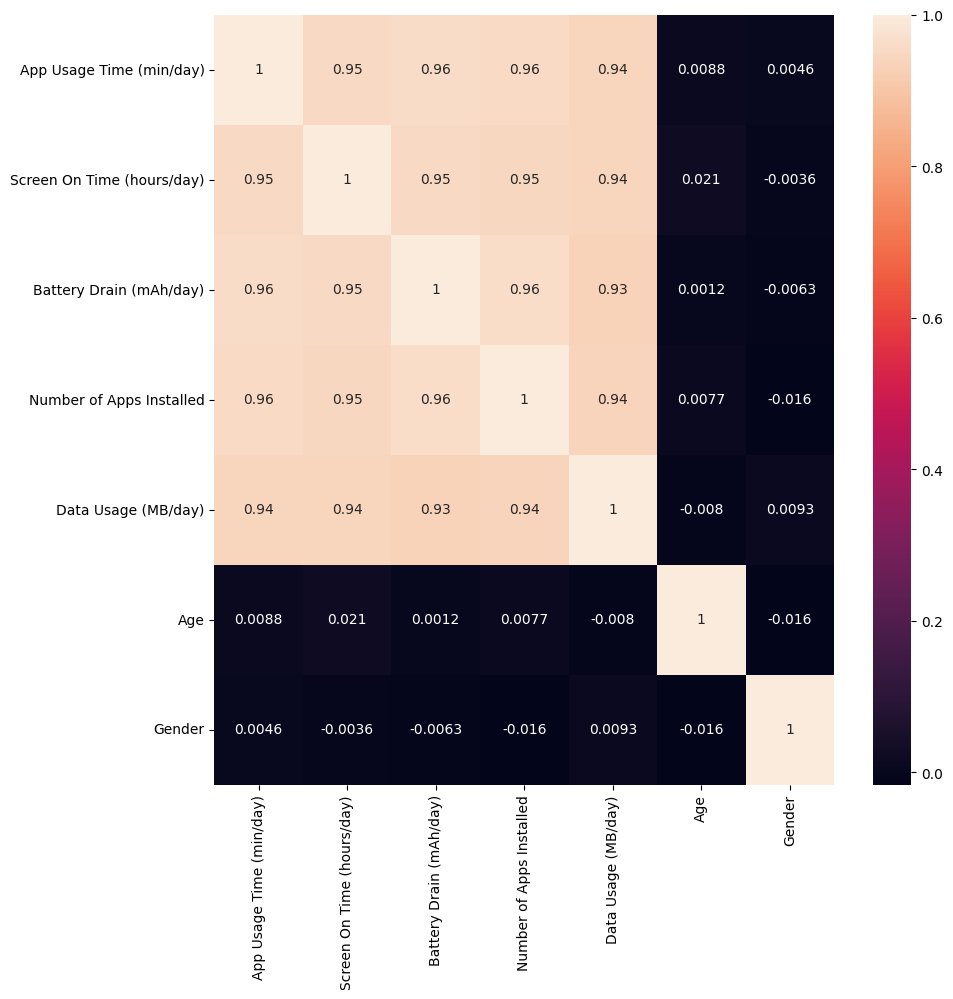

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(columns=['Device Model', 'Operating System', 'User Behavior Class']).corr(), annot=True)
plt.show()

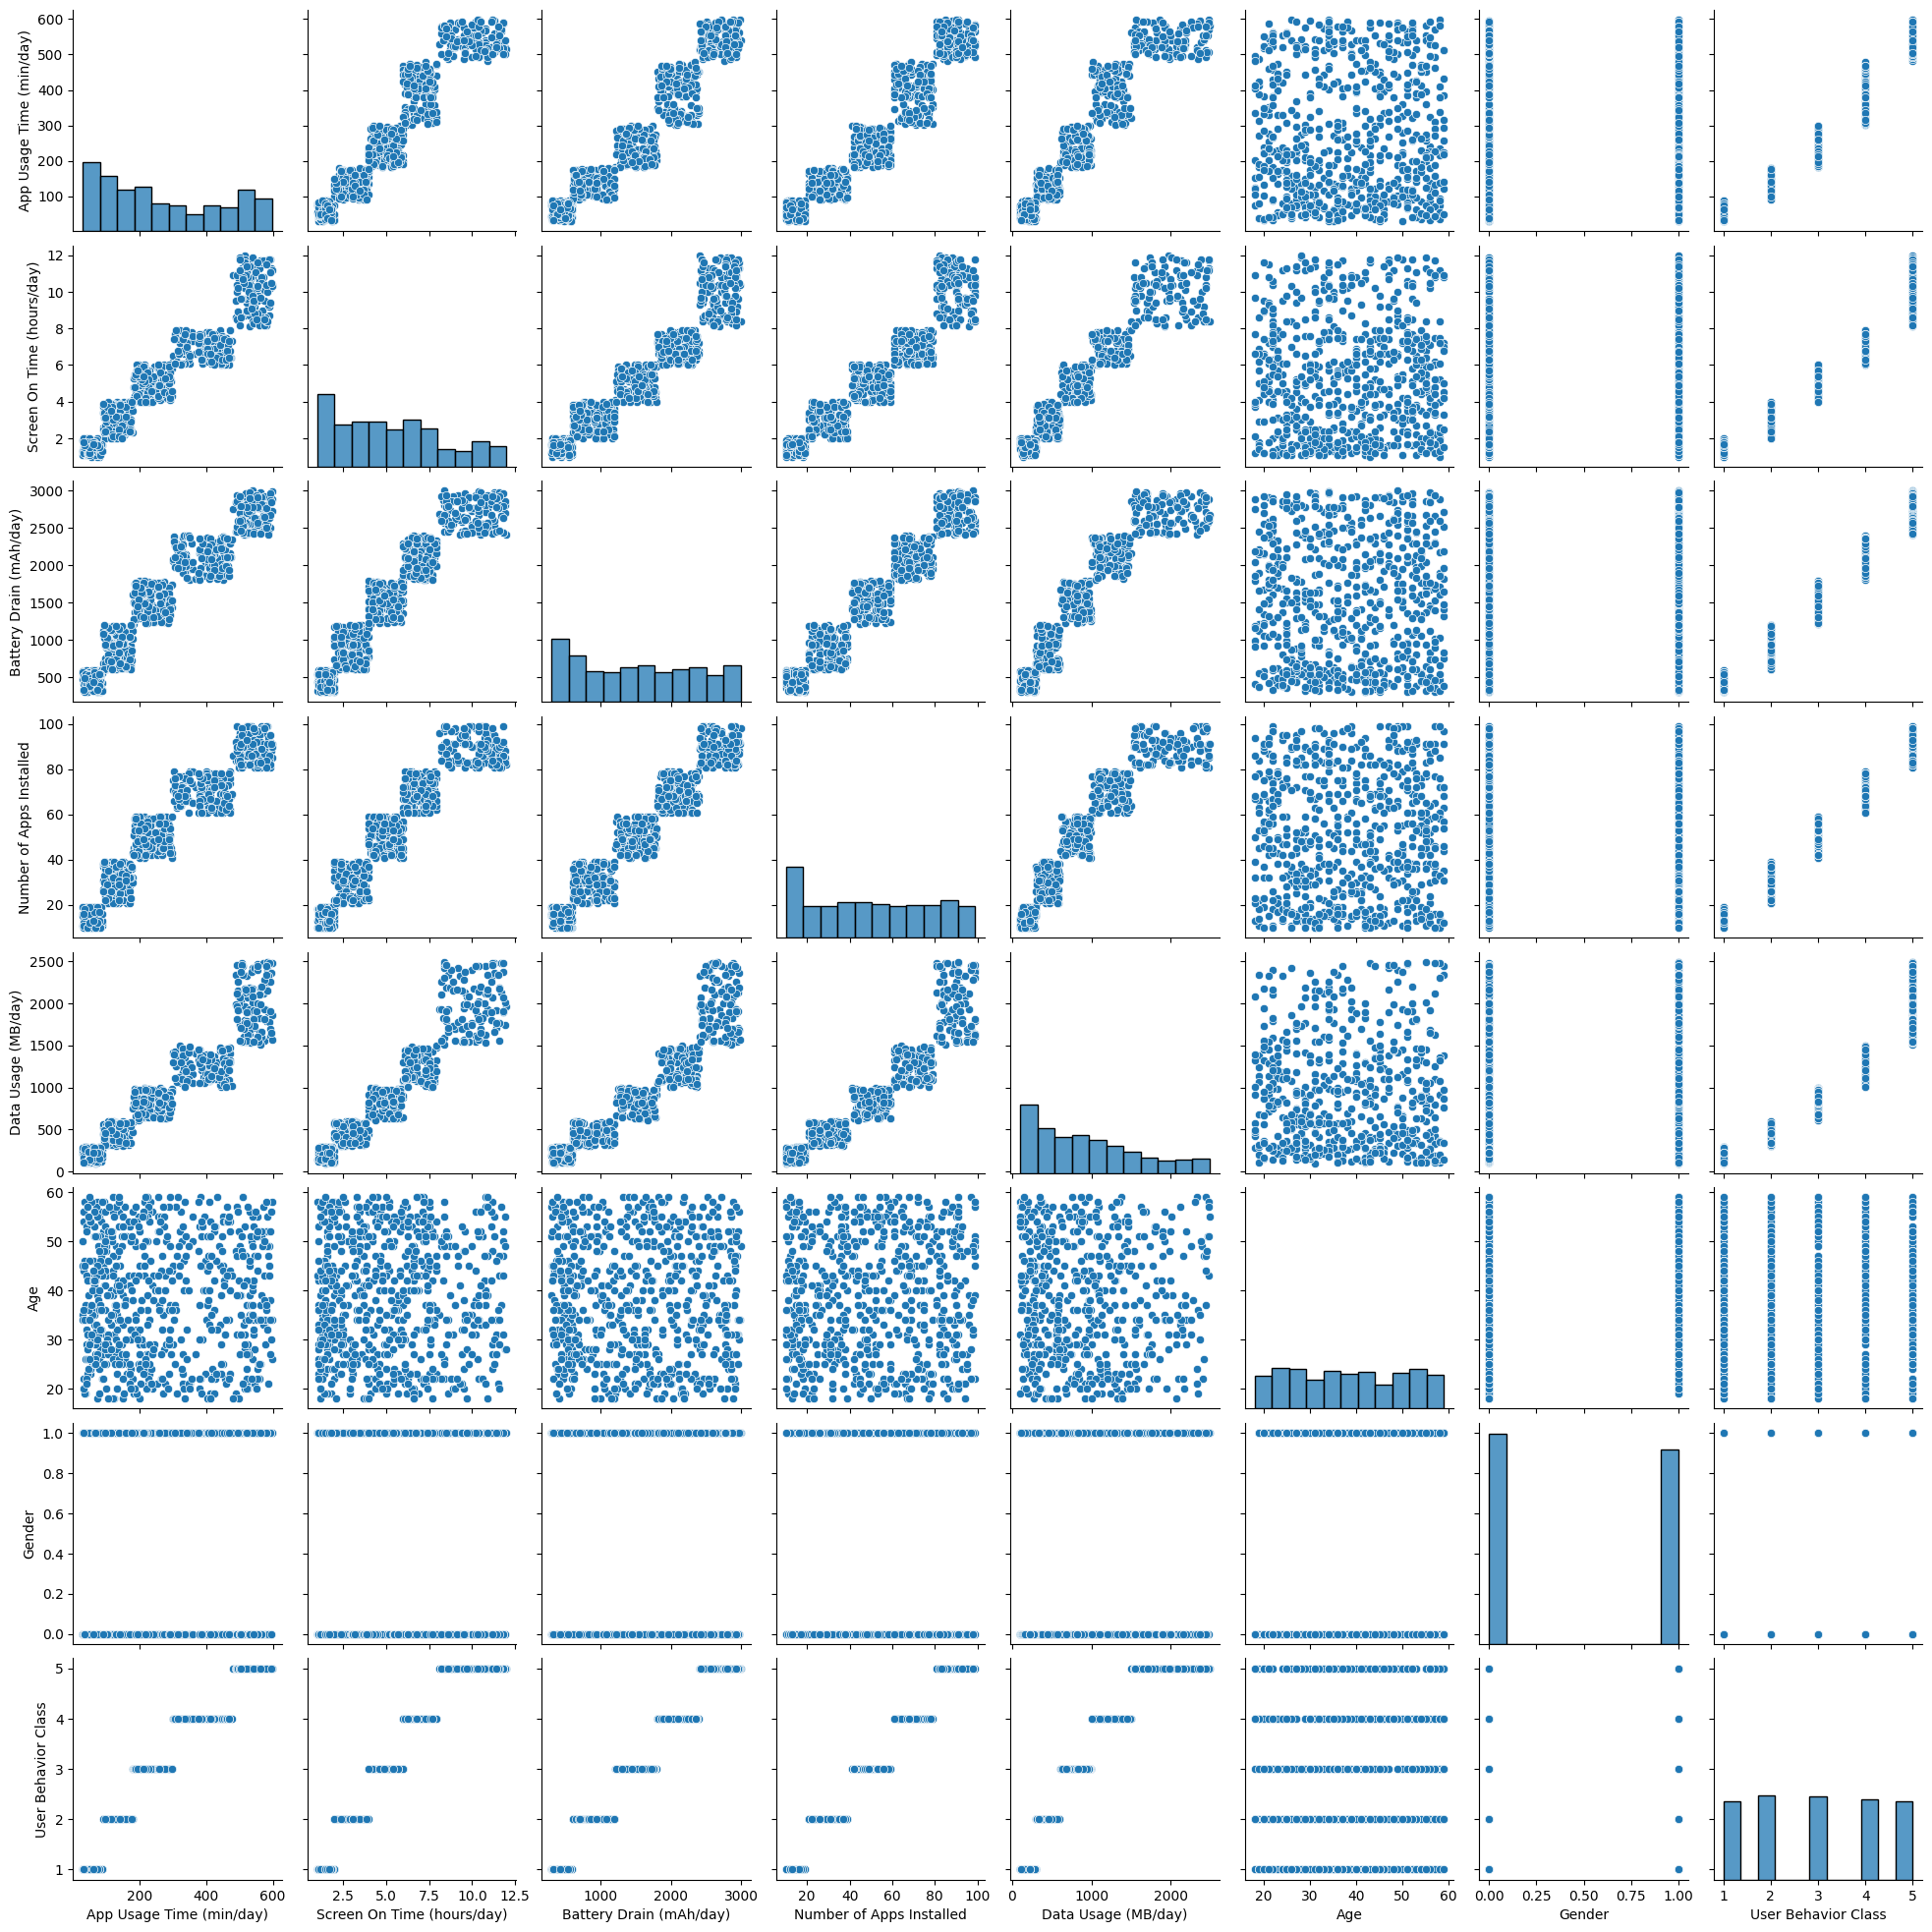

In [8]:
sns.pairplot(df)

Check if the dataset is balanced.

In [9]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [10]:
df.isnull().sum()

Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

In [11]:
df.isnull().sum() / len(df) * 100

Device Model                   0.0
Operating System              10.0
App Usage Time (min/day)       0.0
Screen On Time (hours/day)     0.0
Battery Drain (mAh/day)        0.0
Number of Apps Installed       0.0
Data Usage (MB/day)           20.0
Age                            5.0
Gender                         0.0
User Behavior Class            0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

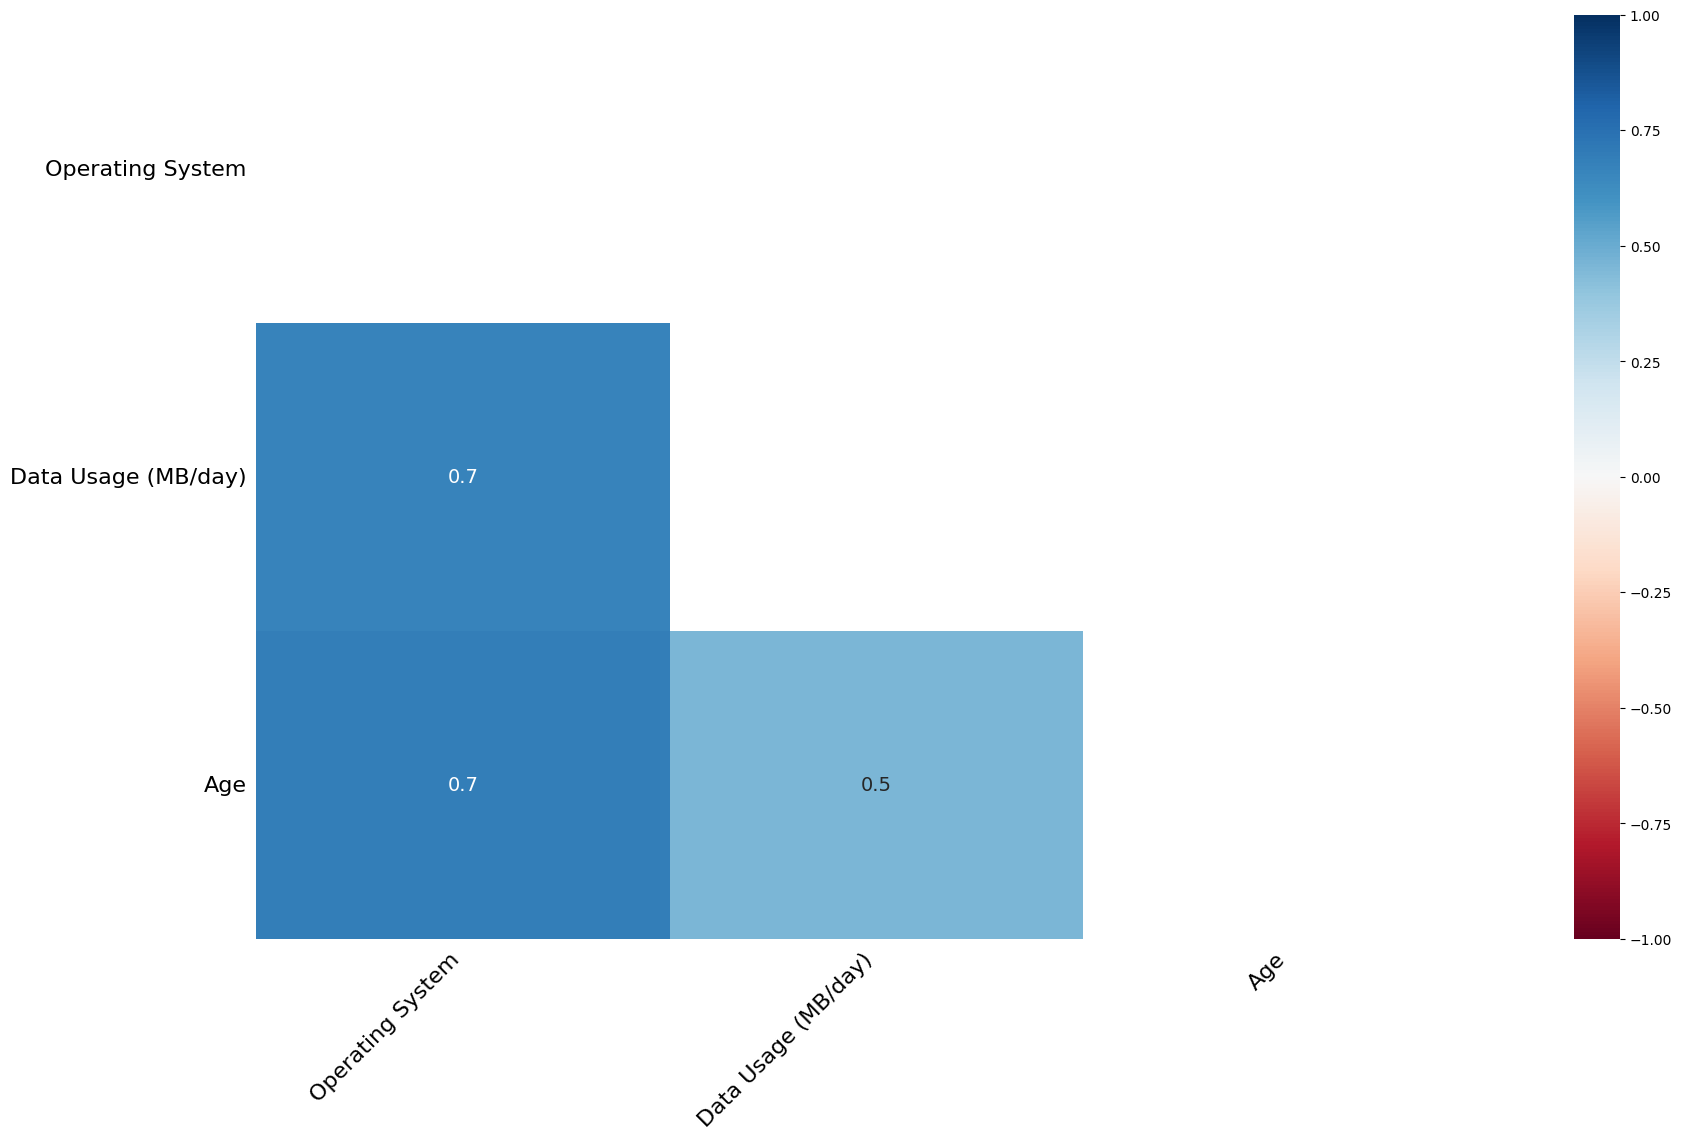

In [12]:
msno.heatmap(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [13]:
df['Operating System'] = df['Operating System'].fillna(
    df['Device Model'].str.startswith('iPhone').map({True: 'iOS', False: 'Android'})
)

In [14]:
imputer = IterativeImputer()

In [15]:
df[['Age', 'Data Usage (MB/day)']] = imputer.fit_transform(df[['Age', 'Data Usage (MB/day)']])

In [16]:
df.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [17]:
dummies = pd.get_dummies(df['Operating System'])
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Operating System', 'iOS'], inplace=True)

In [18]:
df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [19]:
dummies = pd.get_dummies(df['Device Model'])
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Device Model', 'Samsung Galaxy S21'], inplace=True)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [20]:
X, y = df.drop(columns=['User Behavior Class']), df['User Behavior Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling
Standardize the features appropriately.

In [22]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [32]:
model = DecisionTreeClassifier()

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

Use the trained model to make predictions for the test set.

In [34]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        26

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

